In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# I. Analyse share of drivers with penalty points by gender and age 
# import sheet for analysing penalty points by age and gender on Aug 20225, UK
df = pd.read_excel('driving-licence-data-aug-2025.xlsx', 
                   sheet_name='DRL0131 - August 2025', 
                   header=24)

In [3]:
# drop empty and total columns
df.drop(['Current Pts', 'Total'], axis=1, inplace=True)

In [4]:
df.rename(columns={'Unnamed: 0': 'Gender'}, inplace=True)
df.rename(columns={'Unnamed: 1': 'Age'}, inplace=True)

In [5]:
# drop the first empty row and the last total row
df = df.drop([0, 176])

In [6]:
# find the row where data starts for male
# index 88
df[df['Gender'].notnull()]

,Gender,Age,1,2,3,4,5,6,7,8,...,43,44,46,48,57,60,72,96,102,120
1,FEMALE,16,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88,MALE,15,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# fill in empty cells with values, F - Female, M - Male
df.loc[df.index < 88, 'Gender'] = 'F'
df.loc[df.index > 87, 'Gender'] = 'M'

In [8]:
# filter out female data
female_df = df[df['Gender'] == 'F']

# sum the counts of penalty points 1 - 12 for each age
# assuming that under 12 points - current state. While over 12 means data are saved historically in DB for several years.
cols = [str(i) for i in range(1, 13)]
female_df['sum_pts_under_12'] = female_df[cols].sum(axis = 1)

female_df.sort_values(by = 'sum_pts_under_12', ascending=False).head(10)

/var/folders/7z/407pc4ns34ndb3_bml45bsx40000gn/T/ipykernel_69745/4144194896.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_df['sum_pts_under_12'] = female_df[cols].sum(axis = 1)


,Gender,Age,1,2,3,4,5,6,7,8,...,44,46,48,57,60,72,96,102,120,sum_pts_under_12
30,F,45,0.0,1.0,17541.0,254.0,127.0,4445.0,69.0,88.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,23316.0
31,F,46,0.0,0.0,17580.0,220.0,125.0,4156.0,63.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23007.0
29,F,44,0.0,0.0,17318.0,239.0,116.0,4410.0,79.0,74.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22983.0
22,F,37,1.0,2.0,16755.0,321.0,159.0,4540.0,93.0,109.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22767.0
25,F,40,0.0,2.0,16774.0,267.0,128.0,4467.0,76.0,107.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22556.0
28,F,43,0.0,0.0,16842.0,237.0,127.0,4340.0,75.0,83.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22428.0
23,F,38,0.0,0.0,16561.0,284.0,136.0,4487.0,79.0,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22401.0
27,F,42,0.0,0.0,16593.0,225.0,126.0,4358.0,72.0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22241.0
24,F,39,0.0,0.0,16444.0,245.0,140.0,4382.0,86.0,108.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22137.0
21,F,36,0.0,1.0,16112.0,305.0,162.0,4505.0,80.0,113.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22005.0


In [9]:
# filter out male data
male_df = df[df['Gender'] == 'M']

# sum the counts of penalty points 1 - 12 for each age
# assuming that under 12 points - current state. While over 12 means data are saved historically in DB for several years.
cols = [str(i) for i in range(1, 13)]
male_df['sum_pts_under_12'] = male_df[cols].sum(axis = 1)

male_df.sort_values(by = 'sum_pts_under_12', ascending=False).head(10)

/var/folders/7z/407pc4ns34ndb3_bml45bsx40000gn/T/ipykernel_69745/1382799240.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_df['sum_pts_under_12'] = male_df[cols].sum(axis = 1)


,Gender,Age,1,2,3,4,5,6,7,8,...,44,46,48,57,60,72,96,102,120,sum_pts_under_12
127,M,54,0.0,1.0,35477.0,421.0,272.0,10118.0,173.0,194.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49121.0
129,M,56,0.0,2.0,35045.0,370.0,255.0,9790.0,140.0,173.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48172.0
118,M,45,2.0,0.0,32835.0,567.0,330.0,10975.0,212.0,276.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47790.0
110,M,37,0.0,0.0,31105.0,692.0,447.0,12018.0,246.0,434.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47609.0
128,M,55,0.0,1.0,34276.0,408.0,272.0,9867.0,169.0,179.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47584.0
126,M,53,0.0,0.0,33804.0,453.0,273.0,10124.0,175.0,186.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,47413.0
113,M,40,0.0,1.0,31410.0,623.0,407.0,11568.0,256.0,383.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47282.0
117,M,44,0.0,0.0,32340.0,583.0,364.0,11006.0,231.0,288.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47269.0
108,M,35,1.0,0.0,30556.0,674.0,442.0,12014.0,327.0,482.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47265.0
130,M,57,1.0,2.0,34456.0,370.0,215.0,9647.0,144.0,145.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47207.0


In [10]:
# I could say most penalty points are received in age over 35. But it would be correct.
# Let's check how many people in this age have licenses and define percentege of them with penalty points

In [11]:
# import sheet with driving licenses by age and gender on Aug 20225, UK
# dl - for driving licenses
dl = pd.read_excel('driving-licence-data-aug-2025.xlsx', sheet_name='DRL0101- August 2025', header = 20)

In [12]:
# data cleaning
dl.rename(columns={'Unnamed: 0': 'Age'}, inplace=True)
dl.drop(0, inplace=True)

In [13]:
# penalty points can be received both - with provisional and full license. So, I need to sum up data.
dl['total_male'] = dl['Provisional Licences - Male'] + dl['Full Licences - Male'] 
dl['total_female'] = dl['Provisional Licences - Female'] + dl['Full Licences - Female'] 
dl.head()

,Age,Provisional Licences - Male,Provisional Licences - Female,Provisional - Total,Full Licences - Male,Full Licences - Female,Full - Total,total_male,total_female
1,15,2865.0,1563.0,4428.0,0.0,0.0,0.0,2865.0,1563.0
2,16,80540.0,64133.0,144673.0,1225.0,135.0,1360.0,81765.0,64268.0
3,17,232670.0,222470.0,455140.0,40442.0,27781.0,68223.0,273112.0,250251.0
4,18,200783.0,199205.0,399988.0,134492.0,114042.0,248534.0,335275.0,313247.0
5,19,178045.0,178913.0,356958.0,174574.0,149884.0,324458.0,352619.0,328797.0


In [14]:
# get rid of unnecessary data for now
dl.drop(['Provisional Licences - Male', 'Provisional Licences - Female', 'Full Licences - Male', 'Full Licences - Female'], axis=1, inplace=True)

In [15]:
# merge data sets to define percentage of drivers with penalty points
merged_f = pd.merge(female_df, dl, on='Age')
merged_m = pd.merge(male_df, dl, on='Age')

In [16]:
merged_f

,Gender,Age,1,2,3,4,5,6,7,8,...,60,72,96,102,120,sum_pts_under_12,Provisional - Total,Full - Total,total_male,total_female
0,F,16,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,144673.0,1360.0,81765.0,64268.0
1,F,17,0.0,0.0,29.0,0.0,0.0,8.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,42.0,455140.0,68223.0,273112.0,250251.0
2,F,18,0.0,0.0,446.0,5.0,6.0,92.0,1.0,13.0,...,0.0,0.0,0.0,0.0,0.0,567.0,399988.0,248534.0,335275.0,313247.0
3,F,19,0.0,0.0,1479.0,20.0,29.0,297.0,5.0,49.0,...,0.0,0.0,0.0,0.0,0.0,1908.0,356958.0,324458.0,352619.0,328797.0
4,F,20,0.0,0.0,3067.0,59.0,59.0,671.0,12.0,51.0,...,0.0,0.0,0.0,0.0,0.0,4005.0,328081.0,363204.0,357887.0,333398.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,F,98,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,3.0,1285.0,894.0,394.0
83,F,99,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1048.0,701.0,348.0
84,F,100,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,4.0,239.0,172.0,71.0
85,F,101,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,146.0,100.0,47.0


In [17]:
merged_f['percent_with_points'] = (merged_f['sum_pts_under_12'] / merged_f['total_female']) * 100
merged_f.sort_values(by = 'percent_with_points', ascending=False).head(10)

,Gender,Age,1,2,3,4,5,6,7,8,...,72,96,102,120,sum_pts_under_12,Provisional - Total,Full - Total,total_male,total_female,percent_with_points
30,F,46,0.0,0.0,17580.0,220.0,125.0,4156.0,63.0,60.0,...,0.0,0.0,0.0,0.0,23007.0,156091.0,777290.0,487561.0,445820.0,5.160603
31,F,47,0.0,1.0,16094.0,206.0,92.0,3895.0,61.0,63.0,...,0.0,0.0,0.0,0.0,21096.0,142898.0,725645.0,453983.0,414560.0,5.088769
29,F,45,0.0,1.0,17541.0,254.0,127.0,4445.0,69.0,88.0,...,0.0,0.0,0.0,0.0,23316.0,165404.0,799189.0,502463.0,462130.0,5.045334
32,F,48,0.0,0.0,15584.0,169.0,85.0,3745.0,62.0,57.0,...,0.0,0.0,0.0,0.0,20397.0,137620.0,713306.0,445932.0,404994.0,5.036371
28,F,44,0.0,0.0,17318.0,239.0,116.0,4410.0,79.0,74.0,...,0.0,0.0,0.0,0.0,22983.0,166931.0,790339.0,497604.0,459666.0,4.999935
33,F,49,0.0,1.0,15699.0,187.0,92.0,3693.0,43.0,48.0,...,0.0,0.0,0.0,0.0,20465.0,137632.0,728157.0,453402.0,412387.0,4.962572
27,F,43,0.0,0.0,16842.0,237.0,127.0,4340.0,75.0,83.0,...,0.0,0.0,0.0,0.0,22428.0,168480.0,779128.0,491974.0,455634.0,4.922372
34,F,50,0.0,0.0,16095.0,173.0,82.0,3626.0,49.0,45.0,...,0.0,0.0,0.0,0.0,20723.0,136929.0,747062.0,462192.0,421799.0,4.913004
26,F,42,0.0,0.0,16593.0,225.0,126.0,4358.0,72.0,99.0,...,0.0,0.0,0.0,0.0,22241.0,171472.0,778287.0,493416.0,456343.0,4.873746
25,F,41,0.0,1.0,16402.0,244.0,135.0,4236.0,74.0,88.0,...,0.0,0.0,0.0,0.0,21936.0,174298.0,768710.0,488604.0,454404.0,4.827422


In [18]:
merged_m['percent_with_points'] = (merged_m['sum_pts_under_12'] / merged_m['total_male']) * 100
merged_m.sort_values(by = 'percent_with_points', ascending=False).head(10)

,Gender,Age,1,2,3,4,5,6,7,8,...,72,96,102,120,sum_pts_under_12,Provisional - Total,Full - Total,total_male,total_female,percent_with_points
36,M,51,0.0,0.0,31902.0,423.0,279.0,9605.0,187.0,181.0,...,0.0,0.0,1.0,0.0,44882.0,134283.0,761816.0,468151.0,427948.0,9.587078
34,M,49,0.0,0.0,30504.0,429.0,267.0,9587.0,190.0,207.0,...,0.0,0.0,0.0,0.0,43419.0,137632.0,728157.0,453402.0,412387.0,9.576270
32,M,47,0.0,0.0,30054.0,442.0,281.0,9918.0,191.0,242.0,...,0.0,0.0,0.0,0.0,43395.0,142898.0,725645.0,453983.0,414560.0,9.558728
31,M,46,0.0,0.0,32200.0,510.0,304.0,10648.0,222.0,273.0,...,0.0,0.0,0.0,0.0,46585.0,156091.0,777290.0,487561.0,445820.0,9.554702
30,M,45,2.0,0.0,32835.0,567.0,330.0,10975.0,212.0,276.0,...,0.0,0.0,0.0,0.0,47790.0,165404.0,799189.0,502463.0,462130.0,9.511148
33,M,48,0.0,1.0,29452.0,430.0,283.0,9615.0,174.0,218.0,...,0.0,0.0,0.0,0.0,42397.0,137620.0,713306.0,445932.0,404994.0,9.507503
29,M,44,0.0,0.0,32340.0,583.0,364.0,11006.0,231.0,288.0,...,0.0,0.0,0.0,0.0,47269.0,166931.0,790339.0,497604.0,459666.0,9.499321
37,M,52,0.0,1.0,32625.0,452.0,262.0,9947.0,187.0,197.0,...,0.0,0.0,0.0,0.0,45909.0,136166.0,791681.0,483313.0,444534.0,9.498813
35,M,50,0.0,1.0,30707.0,456.0,260.0,9684.0,160.0,197.0,...,0.0,0.0,0.0,0.0,43751.0,136929.0,747062.0,462192.0,421799.0,9.465980
27,M,42,0.0,1.0,31440.0,579.0,365.0,11149.0,260.0,297.0,...,0.0,0.0,0.0,0.0,46670.0,171472.0,778287.0,493416.0,456343.0,9.458550


In [19]:
# The highest proportion of drivers with penalty points is observed among men aged 42 to 52 and women aged 41 to 50. 
# This indicates that middle-aged drivers in these age groups tend to have penalty points more often than other age groups

In [20]:
# who has more point woman or men / more accurate 
# all total penalty man  / all total licenses 

In [21]:
(merged_m['sum_pts_under_12'].sum(axis = 0) / merged_m['total_male'].sum(axis = 0)) * 100

7.940346300996048

In [22]:
(merged_f['sum_pts_under_12'].sum(axis = 0) / merged_f['total_female'].sum(axis = 0)) * 100

3.742778178598373

In [23]:
# union male and female data for one diagram
df_f_m = pd.concat([merged_f, merged_m], ignore_index=True)
df_f_m.head()

,Gender,Age,1,2,3,4,5,6,7,8,...,72,96,102,120,sum_pts_under_12,Provisional - Total,Full - Total,total_male,total_female,percent_with_points
0,F,16,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,144673.0,1360.0,81765.0,64268.0,0.004668
1,F,17,0.0,0.0,29.0,0.0,0.0,8.0,0.0,3.0,...,0.0,0.0,0.0,0.0,42.0,455140.0,68223.0,273112.0,250251.0,0.016783
2,F,18,0.0,0.0,446.0,5.0,6.0,92.0,1.0,13.0,...,0.0,0.0,0.0,0.0,567.0,399988.0,248534.0,335275.0,313247.0,0.181007
3,F,19,0.0,0.0,1479.0,20.0,29.0,297.0,5.0,49.0,...,0.0,0.0,0.0,0.0,1908.0,356958.0,324458.0,352619.0,328797.0,0.580297
4,F,20,0.0,0.0,3067.0,59.0,59.0,671.0,12.0,51.0,...,0.0,0.0,0.0,0.0,4005.0,328081.0,363204.0,357887.0,333398.0,1.201267


In [24]:
# According to the data, male drivers have penalty points approximately twice as often as female drivers. 
# However, this does not necessarily mean that men are less careful drivers, 
# as other factors such as driving frequency, distance travelled may also play a role.

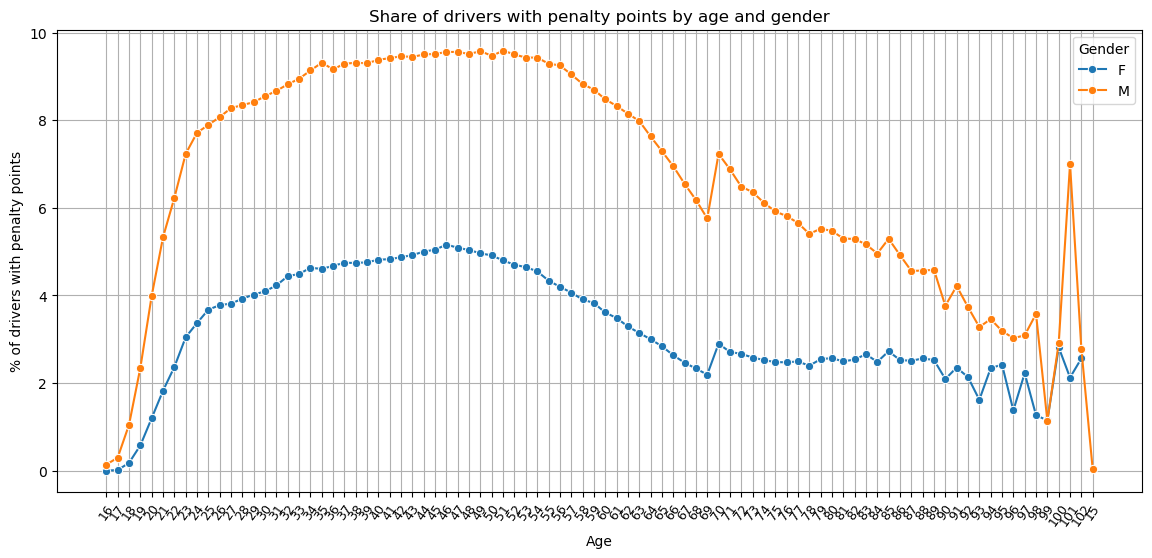

In [25]:
plt.figure(figsize=(14,6)) 
sns.lineplot(
    data=df_f_m,
    x='Age',
    y='percent_with_points',
    hue='Gender',      
    marker="o"
)

plt.title("Share of drivers with penalty points by age and gender")
plt.xlabel("Age")
plt.ylabel("% of drivers with penalty points")
plt.xticks(rotation=55, fontsize=9)  
plt.grid(True)

plt.show()

In [26]:
# II. Analyse share of drivers with penalty points by district.
# import sheet with driving licenses by district on Aug 20225, UK
# dd - driving by distict
dd = pd.read_excel('driving-licence-data-aug-2025.xlsx', sheet_name='DRL0102- August 2025', header=10)
dd.head()

,Unnamed: 0,Provisional Licences - Male,Provisional Licences - Female,Provisional - Total,Full Licences - Male,Full Licences - Female,Full - Total
0,District,NaN,NaN,NaN,NaN,NaN,NaN
1,A12,0.0,0.0,0.0,1.0,0.0,1.0
2,AA78,0.0,0.0,0.0,0.0,1.0,1.0
3,AB01,57.0,66.0,123.0,111.0,70.0,181.0
4,AB02,21.0,27.0,48.0,58.0,40.0,98.0


In [27]:
dd.rename(columns={'Unnamed: 0': 'District'}, inplace=True)
dd.drop(0, inplace=True)

In [28]:
dd.sort_values(by = 'Full - Total', ascending=False).head(11)

,District,Provisional Licences - Male,Provisional Licences - Female,Provisional - Total,Full Licences - Male,Full Licences - Female,Full - Total
3127,Total,4963913.0,5474362.0,10438275.0,22839802.0,19879381.0,42719183.0
482,CR00,24014.0,25643.0,49657.0,52329.0,40962.0,93291.0
1433,LE02,13010.0,13685.0,26695.0,37705.0,28970.0,66675.0
2503,SL06,5189.0,5935.0,11124.0,33571.0,30766.0,64337.0
732,E17,18778.0,17435.0,36213.0,36612.0,25253.0,61865.0
1434,LE03,12126.0,13031.0,25157.0,34978.0,25480.0,60458.0
2663,SW19,8215.0,9281.0,17496.0,32037.0,27360.0,59397.0
288,BS16,5884.0,6366.0,12250.0,30619.0,27666.0,58285.0
1435,LE04,13384.0,15707.0,29091.0,33706.0,24380.0,58086.0
2220,PR04,2344.0,2754.0,5098.0,27742.0,26617.0,54359.0


In [29]:
# import sheet with penalty points by district on Aug 20225, UK
# pbd - penalties by distict
pbd = pd.read_excel('driving-licence-data-aug-2025.xlsx', sheet_name='DRL0132- August 2025', header=24)
pbd.head()

,Unnamed: 0,Current Pts,1,2,3,4,5,6,7,8,...,44,46,48,57,60,72,96,102,120,Total
0,District,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A12,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,AB01,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,AB02,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,AB10,NaN,0.0,0.0,566.0,3.0,6.0,118.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,711.0


In [30]:
pbd.rename(columns={'Unnamed: 0': 'District'}, inplace=True)
pbd.drop(0, inplace=True)
pbd

,District,Current Pts,1,2,3,4,5,6,7,8,...,44,46,48,57,60,72,96,102,120,Total
1,A12,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,AB01,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,AB02,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,AB10,NaN,0.0,0.0,566.0,3.0,6.0,118.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,711.0
5,AB11,NaN,0.0,0.0,439.0,5.0,9.0,133.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,612.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2787,YO62,NaN,0.0,0.0,577.0,3.0,3.0,139.0,3.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,762.0
2788,ZE01,NaN,0.0,0.0,86.0,2.0,2.0,31.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,129.0
2789,ZE02,NaN,0.0,0.0,168.0,5.0,4.0,45.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,228.0
2790,ZE03,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [31]:
pbd.drop('Current Pts', axis=1, inplace=True)

In [32]:
# merge data sets to define percentage of drivers with penalty points by district
merged_penalty_by_district = pd.merge(dd, pbd, on='District')

# filter data with by district with >= 100 drivers
merged_penalty_by_district = merged_penalty_by_district[merged_penalty_by_district['Full - Total'] >= 100].copy()

In [33]:
merged_penalty_by_district['percent_with_penalty'] = (merged_penalty_by_district['Total'] / merged_penalty_by_district['Full - Total']) * 100
top10 = merged_penalty_by_district.sort_values(by = 'percent_with_penalty', ascending=False).head(10)

In [34]:
top10

,District,Provisional Licences - Male,Provisional Licences - Female,Provisional - Total,Full Licences - Male,Full Licences - Female,Full - Total,1,2,3,...,46,48,57,60,72,96,102,120,Total,percent_with_penalty
1423,LS23,307.0,341.0,648.0,3560.0,3659.0,7219.0,0.0,0.0,795.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1126.0,15.597728
1414,LS14,3281.0,4356.0,7637.0,11581.0,9712.0,21293.0,1.0,1.0,2135.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3138.0,14.737238
1031,HX02,2457.0,3109.0,5566.0,12716.0,11145.0,23861.0,0.0,0.0,2403.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3456.0,14.483886
1030,HX01,2584.0,3190.0,5774.0,7477.0,4788.0,12265.0,0.0,0.0,1135.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1762.0,14.366082
172,BD19,1107.0,1306.0,2413.0,8137.0,7519.0,15656.0,0.0,1.0,1585.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2241.0,14.314001
1929,PL03,2158.0,2426.0,4584.0,10757.0,9564.0,20321.0,0.0,0.0,2068.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2877.0,14.157768
1034,HX05,629.0,827.0,1456.0,3476.0,3008.0,6484.0,0.0,0.0,650.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,914.0,14.096237
1033,HX04,520.0,627.0,1147.0,4564.0,4422.0,8986.0,0.0,0.0,909.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1239.0,13.788115
1415,LS15,2042.0,2488.0,4530.0,12916.0,11435.0,24351.0,0.0,0.0,2371.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3345.0,13.736602
1244,L29,26.0,23.0,49.0,192.0,195.0,387.0,0.0,0.0,36.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,13.436693


In [35]:
# The following districts have most percentage of drivers with penalty points:
# LS23 - Wetherby, West Yorkshire
# LS14 / LS15 - Leeds
# HX02 / HX01 / HX05 / HX04 - Halifax, West Yorkshire
# BD19 - Cleckheaton, West Yorkshire
# PL03 / PL3 - Plymouth, Devon
# L29 - Liverpool

In [36]:
# the highest share of drivers with penalty points is observed in districts such as 
# LS23 (Wetherby), LS14/LS15 (Leeds), HX (Halifax) and others. 
# This may be related both to traffic intensity (urban arteries, transit routes) 
# and to the specifics of the dataset (small districts with a limited number of drivers)

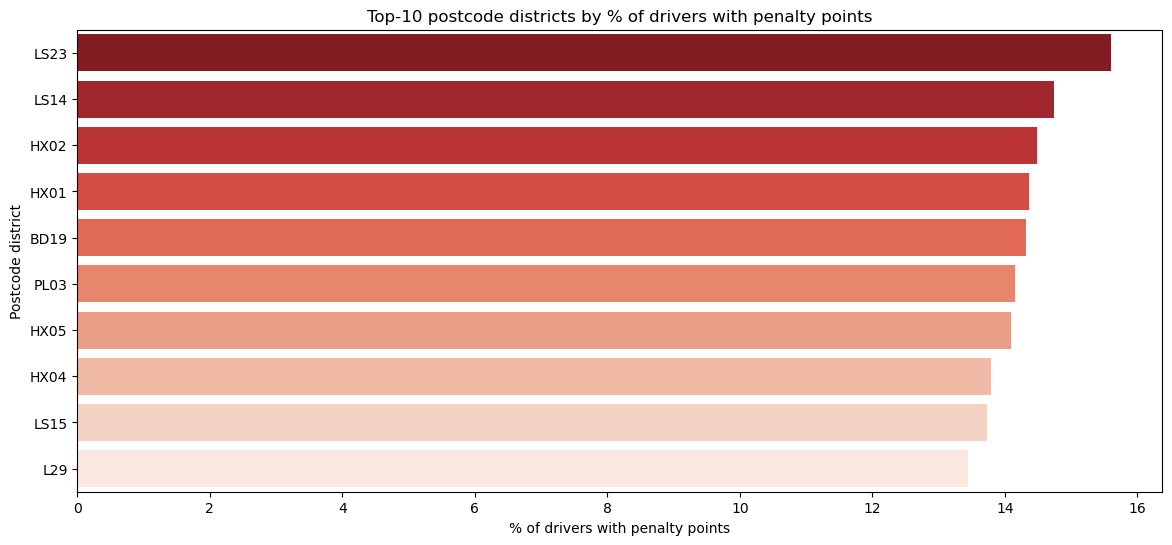

In [40]:
plt.figure(figsize=(14,6))
sns.barplot(
    data=top10,
    x='percent_with_penalty',
    y='District',
    hue='District',     
    palette='Reds_r'   
)
plt.title("Top-10 postcode districts by % of drivers with penalty points")
plt.xlabel("% of drivers with penalty points")
plt.ylabel("Postcode district")
plt.show()